labels.json: C:\Egyetem\mélytanulás\házi\Deep-Learning-project\data\raw\bullflagdetector\Q5C0UO\labels.json
tasks: 4
segments: 53
bull_flag_normal     25
bull_flag_pennant    11
bear_flag_normal      8
bear_flag_pennant     7
bull_flag_wedge       2
Name: count, dtype: int64


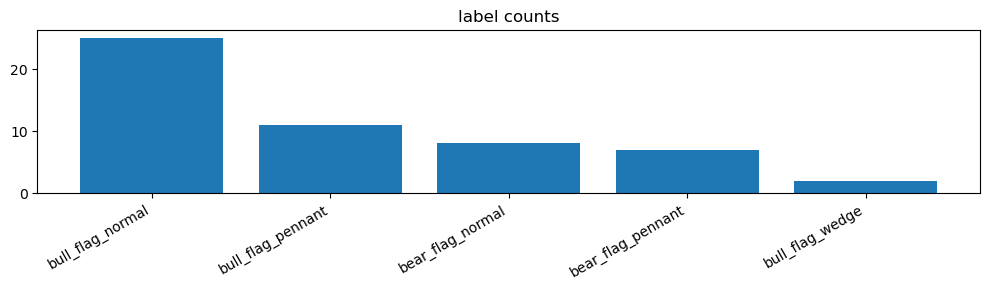

In [2]:
from pathlib import Path
import json

import pandas as pd
import matplotlib.pyplot as plt

dir = (Path.cwd() / ".." / "data" / "raw" / "bullflagdetector" / "Q5C0UO").resolve()
labels_path = dir / "labels.json"
with open(labels_path, "r", encoding="utf-8") as f:
    label_studio_data = json.load(f)

mapping = {
    "Bullish Normal": "bull_flag_normal",
    "Bullish Wedge": "bull_flag_wedge",
    "Bullish Pennant": "bull_flag_pennant",
    "Bearish Normal": "bear_flag_normal",
    "Bearish Wedge": "bear_flag_wedge",
    "Bearish Pennant": "bear_flag_pennant",
}

labels = []
for task in label_studio_data:
    for ann in task.get("annotations", []) or []:
        for res in ann.get("result", []) or []:
            if res.get("type") != "timeserieslabels":
                continue
            value = res.get("value", {}) or {}
            for lab in value.get("timeserieslabels", []) or []:
                if lab in mapping:
                    labels.append(mapping[lab])

counts = pd.Series(labels).value_counts()
print("labels.json:", labels_path)
print("tasks:", len(label_studio_data))
print("segments:", len(labels))
print(counts)

plt.figure(figsize=(10, 3))
plt.bar(counts.index, counts.values)
plt.xticks(rotation=30, ha="right")
plt.title("label counts")
plt.tight_layout()
plt.show()